<font size="5">Exercício - Análise de dados Exploratória</font>

<font size="4">1. Arquivo dados.csv</font>

<font size="3">‎ ‎ ‎ 1. CODIGO</font>

<font size="3">‎ ‎ ‎ 2. MUNICIPIO</font>

<font size="3">‎ ‎ ‎ 3. PIB</font>

<font size="3">‎ ‎ ‎ 4. VALOREMPENHO</font>

<font size="4">2. Empenho em diárias em municípios gaúchos e PIB do município</font>

<font size="4">3. Execute um processo de Análise de Dados Exploratória para conhecimento/Entendimento destes dados</font>

In [5]:
import pandas as pd
import seaborn as srn
import statistics as sts
import matplotlib.pyplot as plt

In [6]:
#Importando dados

dataset = pd.read_csv("../data/dados.csv", sep =";")

In [7]:
#Visualizando tamanho da tabela

dataset.shape

(187, 4)

In [8]:
#Visualizando tabela inteira

dataset

#Porém, será feita uma análise específica para cada coluna.

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86
...,...,...,...,...
182,372,SANTA VITORIA DO PALMAR,27170.89,760.00
183,107,SANTA BARBARA DO SUL,29654.02,365.00
184,54,GETULIO VARGAS,16876.33,233.01
185,382,NOVA SANTA RITA,25938.38,310.58


In [13]:
#Procurando e contando por valores NaN

dataset.isnull().sum()

#Conclusão: Não há dados 

CODIGO          0
MUNICIPIO       0
PIB             0
VALOREMPENHO    0
dtype: int64

In [15]:
#Explorando dados da coluna VALOREMPENHO

dataset["VALOREMPENHO"].describe()

count    1.870000e+02
mean     1.299844e+05
std      1.615491e+05
min      1.721300e+02
25%      5.251718e+04
50%      8.422816e+04
75%      1.538961e+05
max      1.442760e+06
Name: VALOREMPENHO, dtype: float64

In [17]:
#Explorando dados da coluna PIB

dataset["PIB"].describe()

count       187.000000
mean      19808.741337
std       16984.223244
min        8236.630000
25%       13621.455000
50%       17206.190000
75%       21429.165000
max      223848.220000
Name: PIB, dtype: float64

[Text(0.5, 1.0, 'PIB')]

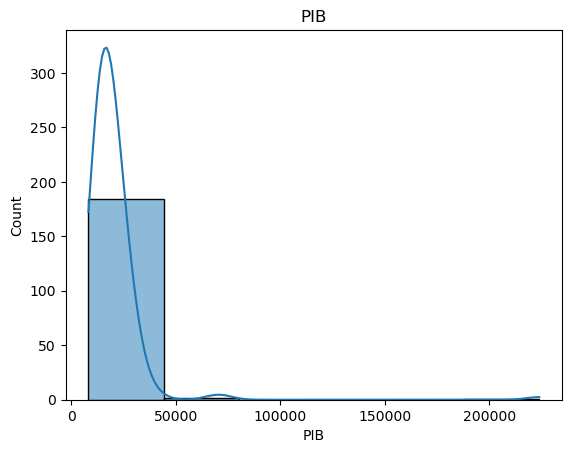

In [19]:
#Visualização da distribuição média do PIB

srn.histplot(dataset.PIB, kde=True, bins=6).set(title="PIB")

[Text(0.5, 1.0, 'VALOREMPENHO')]

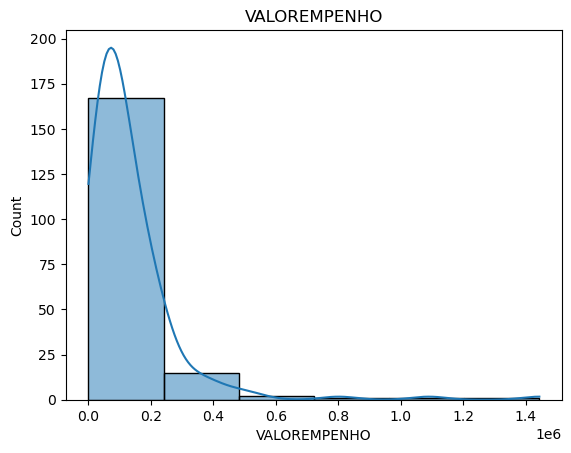

In [21]:
#Visualização da distribuição média do VALOREMPENHO

srn.histplot(dataset.VALOREMPENHO, kde=True, bins=6).set(title="VALOREMPENHO")

<Axes: xlabel='MUNICIPIO'>

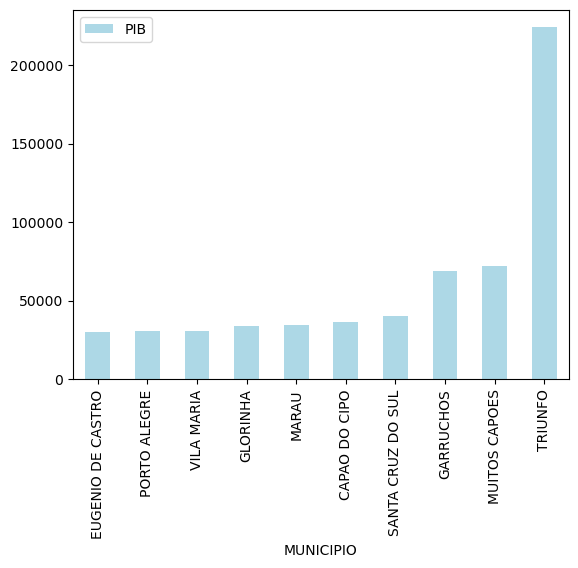

In [25]:
#Visualizando as 10 Cidades com maior PIB

pibgroup = dataset.sort_values('PIB').tail(10)
pibgroup = pibgroup.iloc[:,1:3]
pibgroup
pibgroup.plot.bar(x='MUNICIPIO',y='PIB', color = 'lightblue')

<Axes: xlabel='MUNICIPIO'>

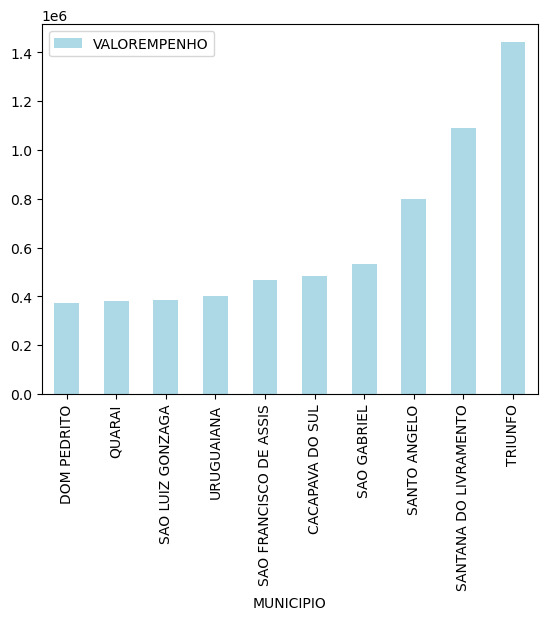

In [23]:
#Visualizando as 10 Cidades com maior VALOREMPENHO

vegroup = dataset.sort_values('VALOREMPENHO').tail(10)
vegroup = vegroup.iloc[:,[1,3]]
vegroup
vegroup.plot.bar(x='MUNICIPIO',y='VALOREMPENHO', color = 'lightblue')

<Axes: xlabel='PIB', ylabel='VALOREMPENHO'>

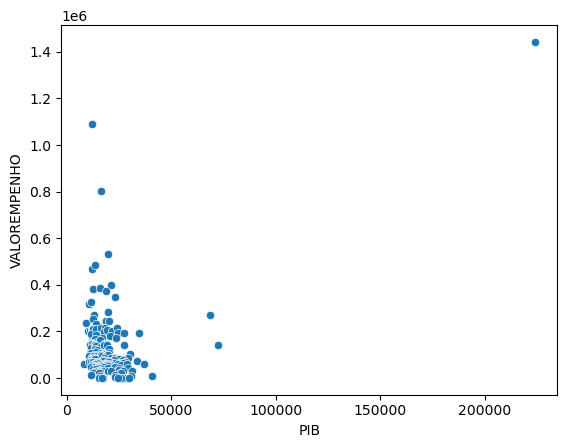

In [27]:
#Visualizando a distribuição do PIB por VALOR EMPENHO

srn.scatterplot(data=dataset, x='PIB', y='VALOREMPENHO')

In [29]:
#Analisando a correlação numérica de PIB e VALOREMPENHO

dataset[['PIB', 'VALOREMPENHO']].corr()

,PIB,VALOREMPENHO
PIB,1.000000,0.484487
VALOREMPENHO,0.484487,1.000000


In [40]:
#Criando coluna PROPORÇÃOEMPENHO para análise

dataset['PROPORCAOEMPENHO'] = dataset['VALOREMPENHO'] / dataset['PIB']

dataset.sort_values('PROPORCAOEMPENHO', ascending=False).head(10)

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO,PROPORCAOEMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10,88.937787
1,113,SANTO ANGELO,16575.82,800669.92,48.303488
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80,38.722205
3,13,CACAPAVA DO SUL,13674.54,485535.86,35.506559
5,98,QUARAI,12552.51,381286.24,30.375299
6,95,PIRATINI,10811.67,315884.50,29.216994
7,325,TUNAS,11543.02,326884.60,28.318811
4,120,SAO GABRIEL,19912.38,533719.86,26.803419
11,248,AMARAL FERRADOR,9216.87,235327.02,25.532206
8,126,SAO LUIZ GONZAGA,15887.14,385185.68,24.245124


Text(0.5, 1.0, 'Top 10 - Gastos Proporcionais')

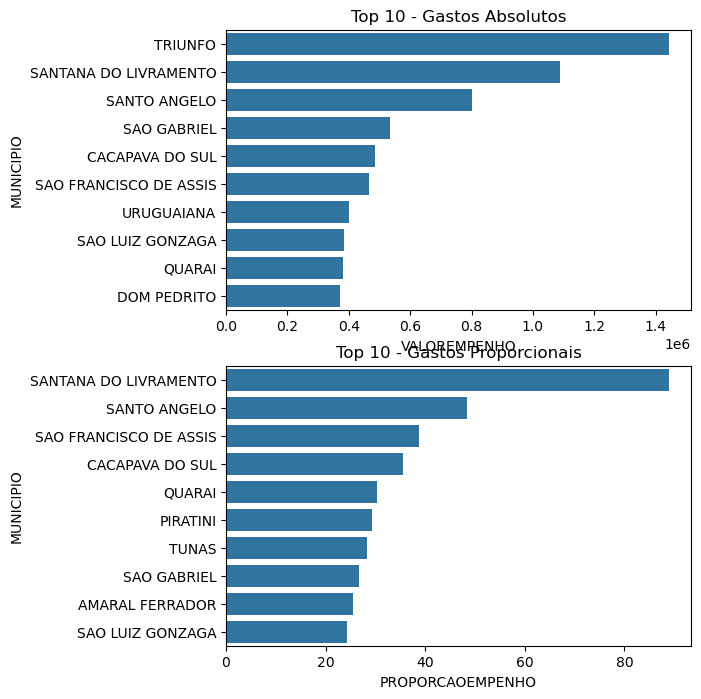

In [62]:
#Visualizando TOP 10 cidades que mais gastam em valores absolutos e relativos

fig, axs = plt.subplots(2, 1, figsize=(6, 8))

#Valores Absolutos (De acordo com o VALOREMPENHO)

srn.barplot(data=dataset.sort_values('VALOREMPENHO', ascending=False).head(10), 
            x='VALOREMPENHO', y='MUNICIPIO', ax=axs[0])
axs[0].set_title('Top 10 - Gastos Absolutos')

#Valores Relativos (De acordo com a PROPORCAOEMPENHO)

srn.barplot(data=dataset.sort_values('PROPORCAOEMPENHO', ascending=False).head(10), 
            x='PROPORCAOEMPENHO', y='MUNICIPIO', ax=axs[1])
axs[1].set_title('Top 10 - Gastos Proporcionais')